{'visualize_image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAJEAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD7gs/hj4rvLWO4+w/62sfxh8K9cstLk8819aeD/C2h/wBjR+f5Vc38YNB0OHS7g+fF/qayxFP2tEyw3tvbHx3oOmz6bdfYZz/qq6DXpvJtftHkVlzCCHxRef8APP8A5Y1oawPO0Hz/APpj/rq6sDS

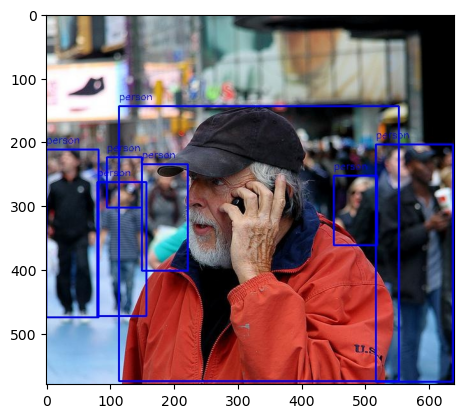

In [11]:
# Import the necessary library
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
import base64
# Set the URL for the Flask API endpoint.
# Update the URL if your API d hosted on a different host or port.
url = "http://127.0.0.1:8000/detection"

# Path to the image file you want to upload.
file_path = "./test_image/000000000395.jpg"  # Replace with your image path

# Open the file in binary mode and prepare the payload.
with open(file_path, "rb") as image_file:
    # 'files' will be sent as multipart form-data with key "image"
    files = {"image": image_file}
    
    # Send the POST request to the API endpoint
    response = requests.post(url, files=files)
    print(response.json())
    image_bytes = np.frombuffer(base64.b64decode(response.json()['visualize_image']), dtype=np.uint8)
    # Decode the image from the NumPy array.
    image_cv = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
# Print the status code and JSON response from the API
image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [8]:
# Import necessary libraries
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
import base64

# Set the URL of the FastAPI detection endpoint
url = "http://127.0.0.1:9900/detection"  # Change if running on a different machine

# Path to the image file you want to upload
file_path = "./test_image/000000000395.jpg"  # Replace with your image path

# Open the file in binary mode and send it to the API
with open(file_path, "rb") as image_file:
    files = {"image": image_file}
    response = requests.post(url, files=files)  # Send the request

# Print the response JSON
print(response.json())

# Decode the base64-encoded image returned by the API
image_bytes = base64.b64decode(response.json()['visualize_image'])
image_np = np.frombuffer(image_bytes, dtype=np.uint8)  # Convert to NumPy array
image_cv = cv2.imdecode(image_np, cv2.IMREAD_COLOR)  # Decode into OpenCV format

# Convert from BGR to RGB for correct visualization
image_rgb = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

# Display the processed image
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis("off")  # Hide axes
plt.show()
import threading

def test_api():
    with open(file_path, "rb") as image_file:
        files = {"image": image_file}
        response = requests.post(url, files=files)
        print(response.json())

# Simulate 4 concurrent requests (equal to batch size)
threads = [threading.Thread(target=test_api) for _ in range(10)]

# Start all threads
for thread in threads:
    thread.start()

# Wait for all to finish
for thread in threads:
    thread.join()


{'request_id': 'c74bcefc-16a8-4e84-894b-6bfee1f5aca1', 'message': 'Processing started. Check status using /result'}


KeyError: 'visualize_image'

In [ ]:
# Import the necessary library
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
import base64
# Set the URL for the Flask API endpoint.
# Update the URL if your API d hosted on a different host or port.
url = "http://127.0.0.1:9/record?page_number=1"

# Path to the image file you want to upload.
file_path = "./test_image/000000000395.jpg"  # Replace with your image path

# Open the file in binary mode and prepare the payload.
with open(file_path, "rb") as image_file:
    # 'files' will be sent as multipart form-data with key "image"
    files = {"image": image_file}
    
    # Send the POST request to the API endpoint
    response = requests.get(url)
    print(response.json())
    image_bytes = np.frombuffer(base64.b64decode(response.json()['visualize_image']), dtype=np.uint8)
    # Decode the image from the NumPy array.
    image_cv = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
# Print the status code and JSON response from the API
image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

[{'id': 1, 'filename': '000000000395.jpg', 'time': '2025-03-02T10:51:55.333706', 'person_count': 7}]


TypeError: list indices must be integers or slices, not str

Request submitted. ID: 2fb59836-fd85-4d00-a033-ad2c9be98f46
Request submitted. ID: 305c2ba6-d57d-4413-97e2-402e75b0e0ce
Request submitted. ID: 65f1ddf4-3119-495c-8a78-e8b15eae55d3
Request submitted. ID: c8f36c61-f770-4e9c-bca1-7bb07cecfbf3
Request submitted. ID: dac7a894-9ee0-4460-8a21-78c98fffe87a
Request submitted. ID: b2c31a5f-2721-4b10-976b-2b250b408548
Request submitted. ID: 9dd90ab0-2f99-4a2c-b4b3-105a7662f5f0
Request submitted. ID: be7ee9ef-db62-4cef-ab03-4f840430e705
Request submitted. ID: ccf983ce-cec1-4842-9ffe-4358a7e2d20e
Request submitted. ID: 186045d8-856f-4ab0-b765-a2b28c9684a1
Request submitted. ID: 084dc3a4-f3fa-4534-8c7c-0383a6b6140c
Request submitted. ID: 07c955ac-a01b-4b55-b568-cda0b8d09107
Request submitted. ID: 728f3bee-c03c-416f-ae43-03d3e40ae1f6
Request submitted. ID: a1ce981e-0627-4277-b18d-a810afed7cc1
Request submitted. ID: d4d115cf-fa0e-48a9-911c-ce30ec702663
Request submitted. ID: 2a5ae76e-a77f-42dc-8984-2bccf7e2ecf1
Request submitted. ID: 08c407fd-cde2-48f

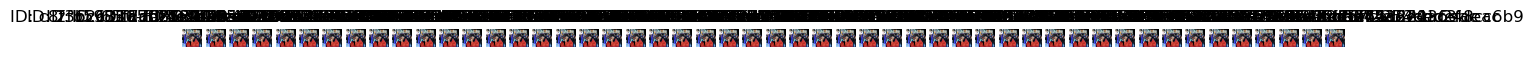

In [11]:
import requests
import time
import threading
import base64
import io
from PIL import Image
import matplotlib.pyplot as plt

# FastAPI server URL
BASE_URL = "http://localhost:9900"
UPLOAD_ENDPOINT = f"{BASE_URL}/detection"
RESULT_ENDPOINT = f"{BASE_URL}/result"

# Sample image path
IMAGE_PATH = "./test_image/000000000395.jpg"

# Store request IDs and responses
request_results = {}

# Function to load the sample image
def load_sample_image():
    try:
        with open(IMAGE_PATH, "rb") as img_file:
            return img_file.read()
    except FileNotFoundError:
        print(f"Error: Image file not found at {IMAGE_PATH}")
        return None

# Function to send a request and fetch result
def send_request():
    image_bytes = load_sample_image()
    if image_bytes is None:
        return

    files = {"image": ("image.jpg", image_bytes, "image/jpeg")}
    
    response = requests.post(UPLOAD_ENDPOINT, files=files)
    if response.status_code == 200:
        request_id = response.json()["request_id"]
        print(f"Request submitted. ID: {request_id}")
        
        # Poll for results
        while True:
            result_response = requests.get(f"{RESULT_ENDPOINT}/{request_id}")
            if result_response.status_code == 200:
                result_data = result_response.json()
                request_results[request_id] = result_data
                print(f"Result for {request_id}: {result_data}")
                break
            else:
                print(f"Waiting for {request_id}...")
                time.sleep(2)  # Wait before polling again
    else:
        print(f"Error submitting request: {response.json()}")

# Run multiple requests in parallel to test batching
num_requests = 50
threads = []

for _ in range(num_requests):
    t = threading.Thread(target=send_request)
    t.start()
    threads.append(t)

# Wait for all threads to finish
for t in threads:
    t.join()

# Display all processed images
fig, axes = plt.subplots(1, len(request_results), figsize=(15, 5))

for ax, (req_id, result) in zip(axes, request_results.items()):
    image_base64 = result["visualize_image"]
    image_bytes = base64.b64decode(image_base64)
    image = Image.open(io.BytesIO(image_bytes))
    
    ax.imshow(image)
    ax.axis("off")
    ax.set_title(f"ID: {req_id}")

plt.show()


In [3]:
import psycopg2
postgres_client = psycopg2.connect(
        database="postgres_database", host="localhost",
        user="postgres_user", password="postgres_password", port=5432)

cursor = postgres_client.cursor()
select_query = "SELECT * FROM file_visualization;"
cursor.execute(select_query)

# Fetch all rows
records = cursor.fetchall()

# Print results
for row in records:
    print(row)  # (id, filename, time, person_count)



(1, '000000000328.jpg', datetime.datetime(2025, 2, 23, 18, 20, 5, 193177), 3)
(2, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 31, 7, 52778), 7)
(3, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37, 6, 396275), 7)
(4, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37, 6, 490382), 7)
(5, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37, 6, 575625), 7)
(6, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37, 6, 663329), 7)
(7, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37, 6, 715954), 7)
(8, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37, 6, 774571), 7)
(9, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37, 6, 821475), 7)
(10, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37, 6, 897615), 7)
(11, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37, 6, 955620), 7)
(12, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37, 7, 24654), 7)
(13, '000000000395.jpg', datetime.datetime(2025, 2, 23, 18, 37,

In [6]:
import mlflow
import torch
from ultralytics import YOLO

# Download the artifact (replace <RUN_ID> with the actual MLflow run ID)
downloaded_path = mlflow.artifacts.download_artifacts(
    run_id="b4c321d905e34674be1d96af8153c760",
    artifact_path="model_weights/yolov8n.pth"  # or "model_weights/yolov8n.pt" if you logged the full file
)

# Load the state dictionary from the downloaded file
state_dict = torch.load(downloaded_path)

# Instantiate the model architecture (ensure it matches the one used during training)
model = YOLO("yolov8n.pt")  # this loads the architecture; you may then override its weights

# Load the state dictionary into the model
model.model.load_state_dict(state_dict, strict=True)
print("Successfully loaded weights from MLflow artifact into the model.")


MlflowException: Run 'b4c321d905e34674be1d96af8153c760' not found